In [1]:
import pandas as pd

In [11]:
%matplotlib inline

In [3]:
avengers = pd.read_csv('avengers.csv',encoding='latin1')

In [8]:
avengers.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBF201F1D0>]],
      dtype=object)

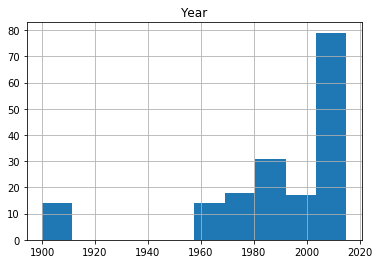

In [12]:
avengers.hist(column='Year')

In [21]:
true_avengers = avengers[avengers['Year'] >= 1960]

In [18]:
Deaths = (true_avengers['Death1'] == 'YES') * 1

for i in range(2,6):
    Deaths += (true_avengers['Death' + str(i)] == 'YES') * 1

true_avengers['Deaths'] = Deaths

C:\Users\natew\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
def clean_deaths(row):
    num_deaths = 0
    columns = ['Death1', 'Death2', 'Death3', 'Death4', 'Death5']
    
    for c in columns:
        death = row[c]
        if pd.isnull(death) or death == 'NO':
            continue
        elif death == 'YES':
            num_deaths += 1
    return num_deaths

true_avengers['Deaths'] = true_avengers.apply(clean_deaths, axis=1)

C:\Users\natew\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [23]:
joined_accuracy_count  = int()

In [ ]:
joined_accuracy = (2015 - true_avengers['Year'] == true_avengers['Years since joining'])

len(joined_accuracy[joined_accuracy == True])

In [ ]:
joined